In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv')

In [31]:
df.head(10)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0
5,2020-01-31,12977,9620,242,19327,0,0.0
6,2023-03-01,17387,11627,362,21753,5544,108.0
7,2021-07-17,2735,3651,0,5236,0,20.0
8,2023-03-07,17674,11859,364,21560,5700,91.0
9,2020-11-12,13405,6989,273,13688,4983,74.0


In [30]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']


In [33]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


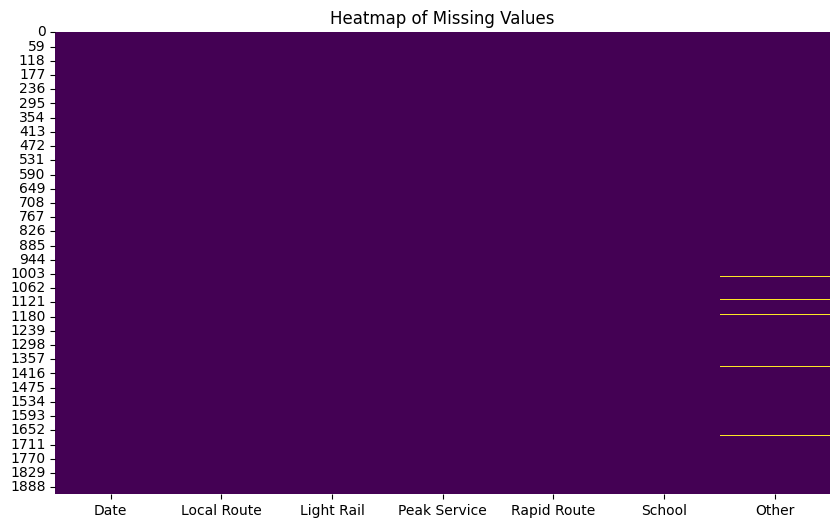

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [32]:
# Display dataset structure
print(f"Number of Rows: {df.shape[0]}")  # Row count
print(f"Number of Columns: {df.shape[1]}")  # Column count

Number of Rows: 1918
Number of Columns: 7


In [36]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [37]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [38]:
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.000000   7507.000000    193.000000   
75%    2023-06-07 18:00:00  15517.500000  10008.250000    313.750000   
max    2024-09-29 00:00:00  21070.000000  15154.000000   1029.000000   
std                    NaN   6120.715714   3345.616428    156.532738   

        Rapid Route       School        Other  
count   1918.000000  1918.000000  1918.000000  
mean   12597.213243  2352.694995    43.390411  
min        0.000000     0.000000     0.000000  
25%     6383.000000     0.000000    15.000000  
50%    13106.500000   567.500000    41.000000  
75%    17924.750

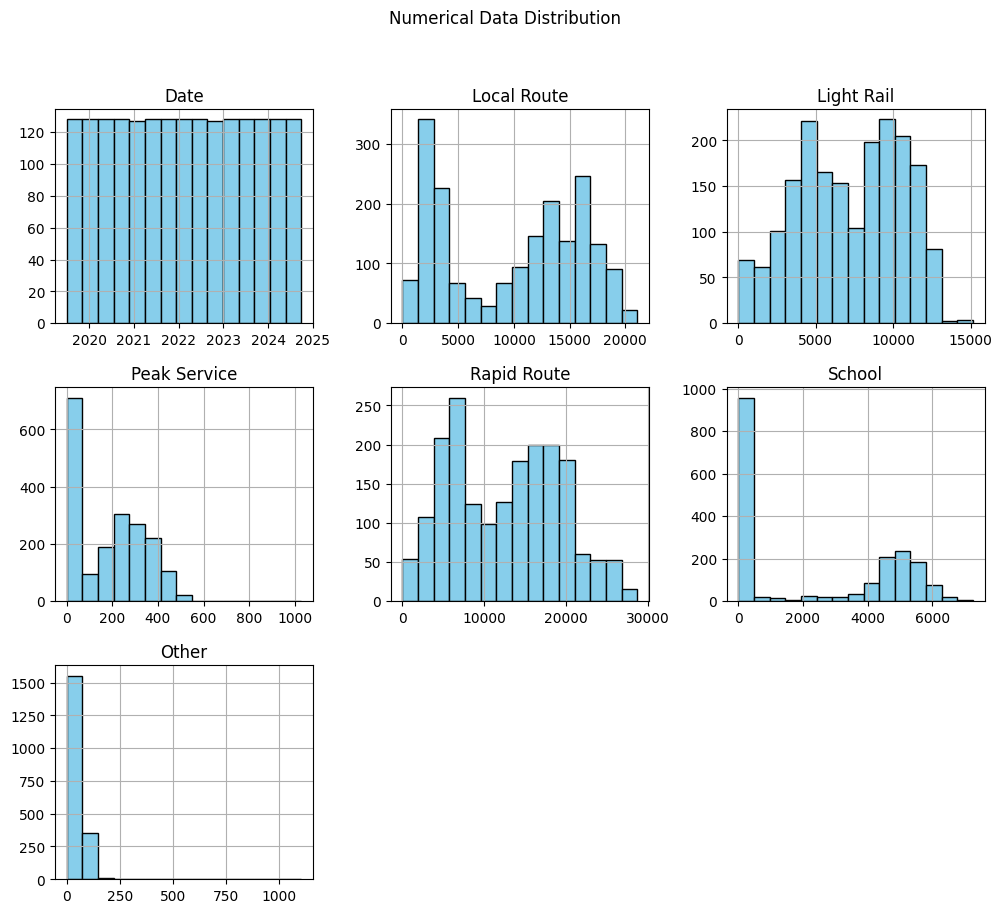

In [39]:
df.hist(figsize=(12, 10), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Numerical Data Distribution")
plt.show()

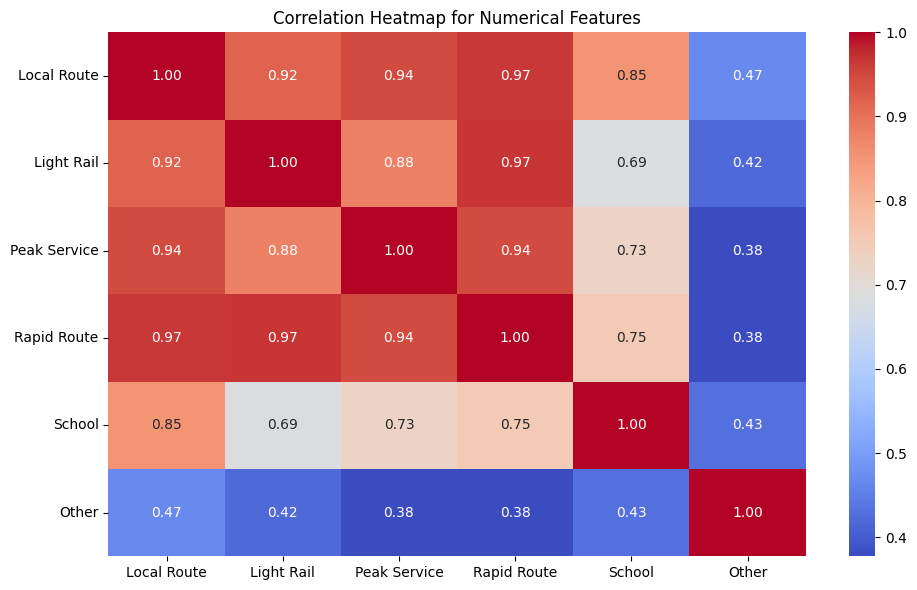

In [40]:
# 6. Correlation Analysis for Numerical Columns
if len(numeric_cols) > 1:  # Check if there are at least two numerical columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap for Numerical Features")
    plt.tight_layout()
    plt.show()

In [41]:
print("\nFinal Dataset Info After Cleaning:")
print(df.info())


Final Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB
None


INSIGHTS FROM THE DATA

In [42]:

df["Date"] = pd.to_datetime(df["Date"])

df["Day_of_Week"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()  # Month name
df["Year"] = df["Date"].dt.year  # Year
df["Is_Weekend"] = df["Day_of_Week"].isin(["Saturday", "Sunday"])  # Weekend flag

TOTAL ROUTES PER COLUMNS

In [43]:
route_cols = [
    "Local Route",
    "Light Rail",
    "Peak Service",
    "Rapid Route",
    "School",
    "Other",
]
df["Total_Routes"] = df[route_cols].sum(axis=1)

print("\nTotal Usage Summary:")
print(df[route_cols].sum())


Total Usage Summary:
Local Route     1.897170e+07
Light Rail      1.380087e+07
Peak Service    3.444370e+05
Rapid Route     2.416146e+07
School          4.512469e+06
Other           8.322281e+04
dtype: float64


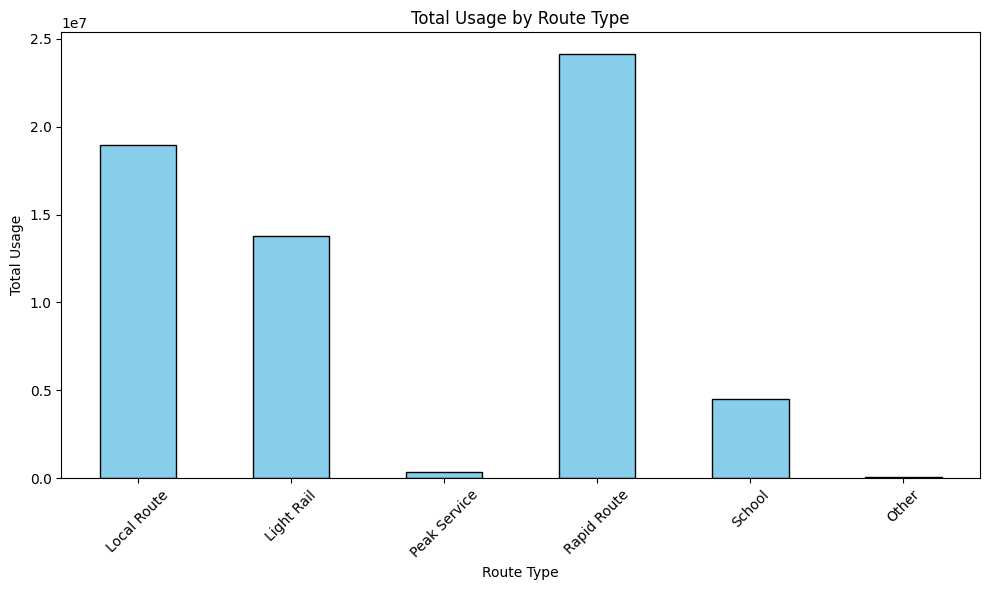

In [44]:
plt.figure(figsize=(10, 6))
df[route_cols].sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Usage by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Total Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Weekly Usage by Route Type:
             Local Route  Light Rail  Peak Service  Rapid Route  School  \
Day_of_Week                                                               
Friday           3436989     2331803         55582      4094151  856468   
Monday           3135842     2066385         64576      3797318  825936   
Saturday          896297     1370268             0      1819562      40   
Sunday            600572      983131             0      1384622      20   
Thursday         3607678     2333170         69886      4312767  923370   
Tuesday          3628602     2354131         77194      4370228  946472   
Wednesday        3665716     2361978         77199      4382807  960163   

                    Other  
Day_of_Week                
Friday       14994.780822  
Monday       12172.390411  
Saturday      5414.342466  
Sunday        4940.780822  
Thursday     15975.171233  
Tuesday      14327.171233  
Wednesday    15398.171233  


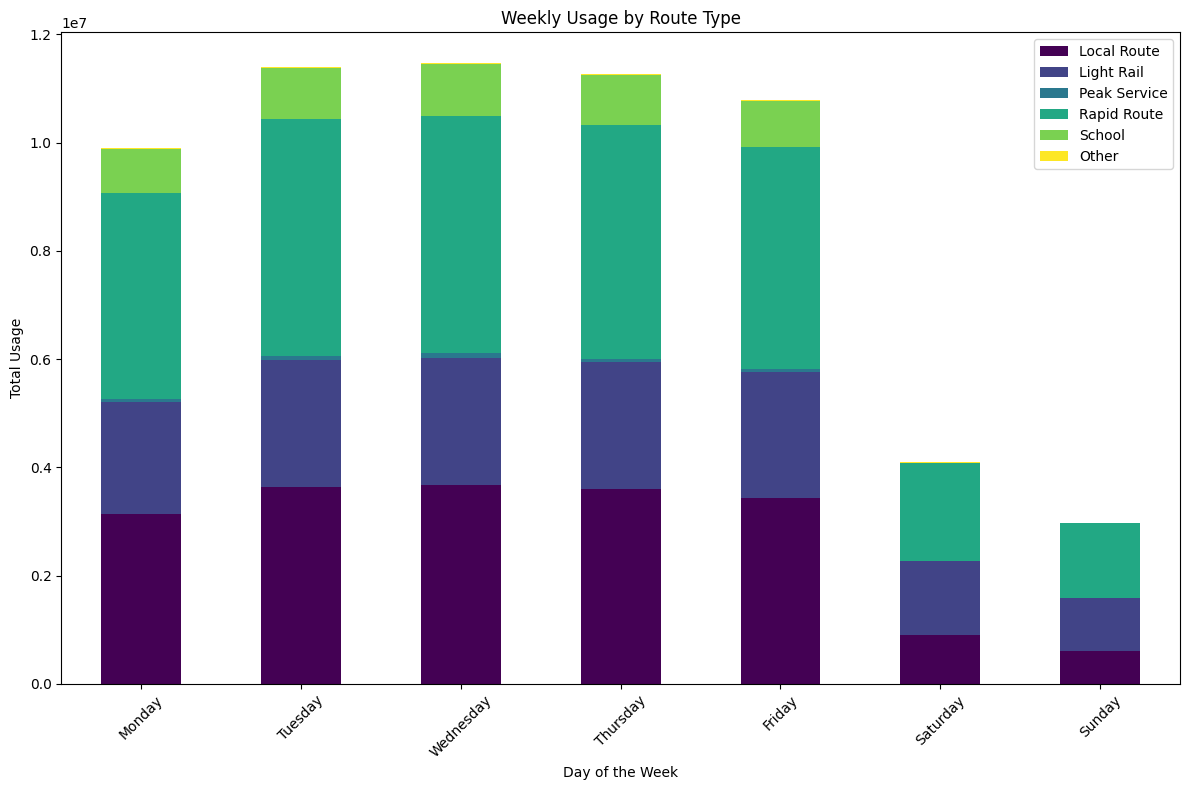

In [45]:
weekly_usage = df.groupby("Day_of_Week")[route_cols].sum()

print("\nWeekly Usage by Route Type:")
print(weekly_usage)

weekly_usage = weekly_usage.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
weekly_usage.plot(kind="bar", figsize=(12, 8), stacked=True, colormap="viridis")
plt.title("Weekly Usage by Route Type")
plt.xlabel("Day of the Week")
plt.ylabel("Total Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Monthly Usage by Route Type:
           Local Route  Light Rail  Peak Service  Rapid Route  School  \
Month                                                                   
April          1216099      946856         23163      1608636  194644   
August         2023910     1399927         35722      2538365  566250   
December       1297491     1027924         21803      1702295  150201   
February       1813470     1255338         31647      2225550  586507   
January        1121890      934003         22185      1568806    7560   
July           1877881     1405892         36797      2448037  345513   
June           1480647     1058149         26431      1817458  433347   
March          1808995     1258904         32588      2276888  538714   
May            1575968     1099021         28098      1904306  457855   
November       1660698     1164481         30107      2054167  496924   
October        1448676     1065237         26207      1907835  323521   
September      164597

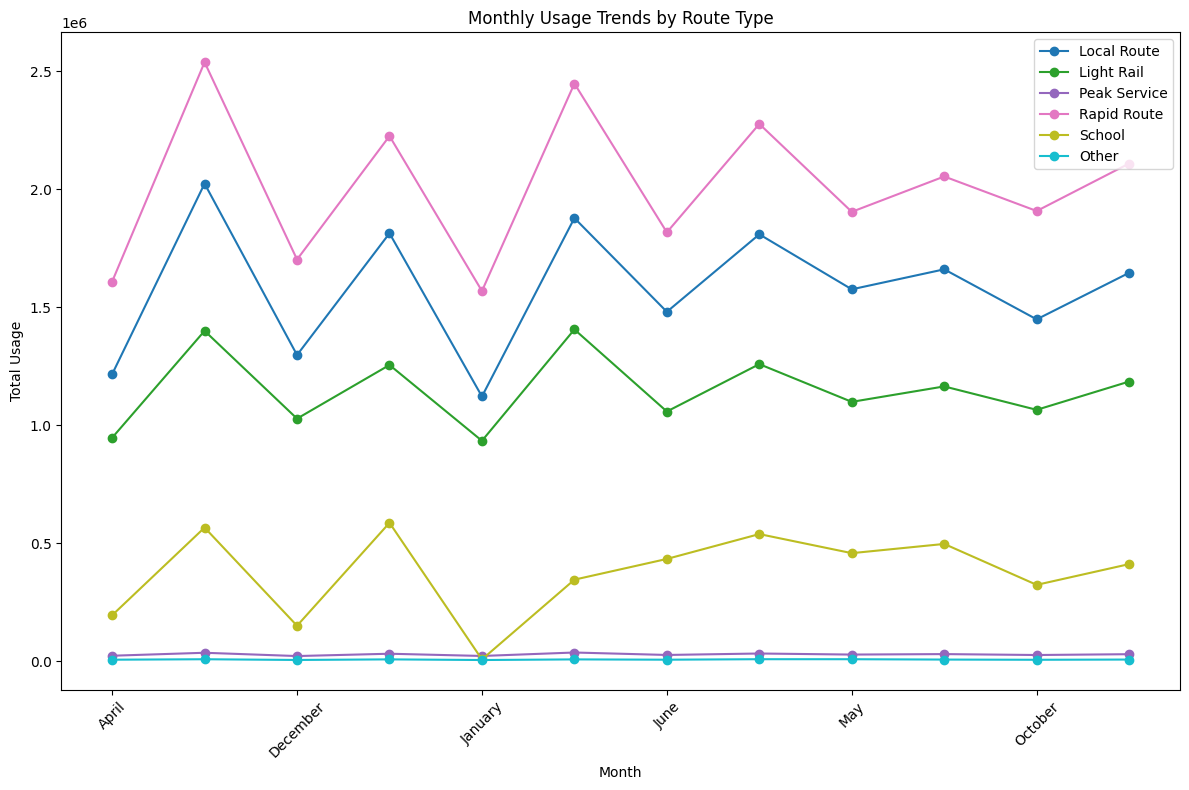

In [46]:
monthly_usage = df.groupby("Month")[route_cols].sum()

print("\nMonthly Usage by Route Type:")
print(monthly_usage)

monthly_usage.plot(kind="line", figsize=(12, 8), marker="o", colormap="tab10")
plt.title("Monthly Usage Trends by Route Type")
plt.xlabel("Month")
plt.ylabel("Total Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Weekend vs Weekday Usage:
         Local Route  Light Rail  Peak Service  Rapid Route     School  \
Weekday   17474827.0  11447467.0      344437.0   20957271.0  4512409.0   
Weekend    1496869.0   2353399.0           0.0    3204184.0       60.0   

                Other  
Weekday  72867.684932  
Weekend  10355.123288  


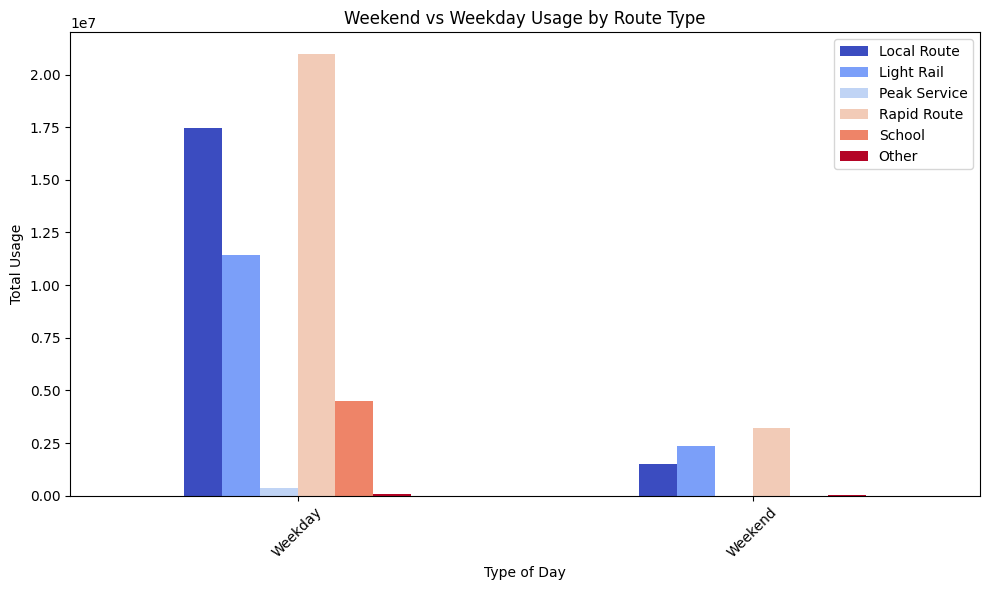

In [47]:
weekend_usage = df[df["Is_Weekend"]][route_cols].sum()
weekday_usage = df[~df["Is_Weekend"]][route_cols].sum()

weekend_vs_weekday = pd.DataFrame(
    {"Weekday": weekday_usage, "Weekend": weekend_usage}
).transpose()

print("\nWeekend vs Weekday Usage:")
print(weekend_vs_weekday)

weekend_vs_weekday.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Weekend vs Weekday Usage by Route Type")
plt.xlabel("Type of Day")
plt.ylabel("Total Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

FORECAST


Forecasting for Local Route using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Forecasting for Light Rail using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Forecasting for Peak Service using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Forecasting for Rapid Route using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Forecasting for School using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.1

Forecasting for Other using ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Consultation (Ranking of Routes from Highest to Lowest Forecast):
1. Rapid Route with an average forecast of 12578.71
2. Local Route with an average forecast of 9872.44
3. Light Rail with an average forecast of 7189.00
4. School with an average forecast of 2343.88
5. Peak Service with an average forecast of 179.75
6. Other with an average forecast of 45.34


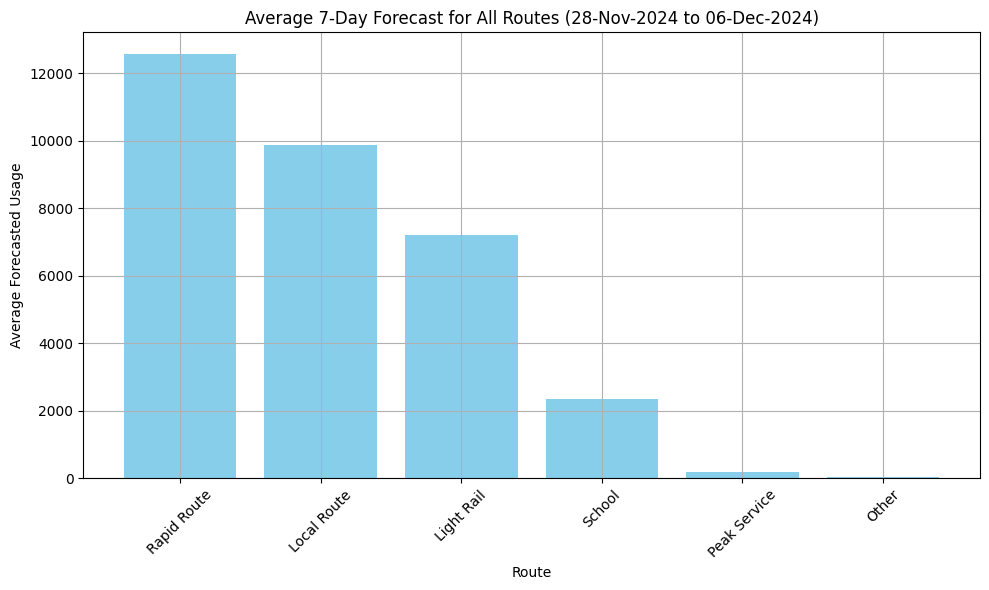

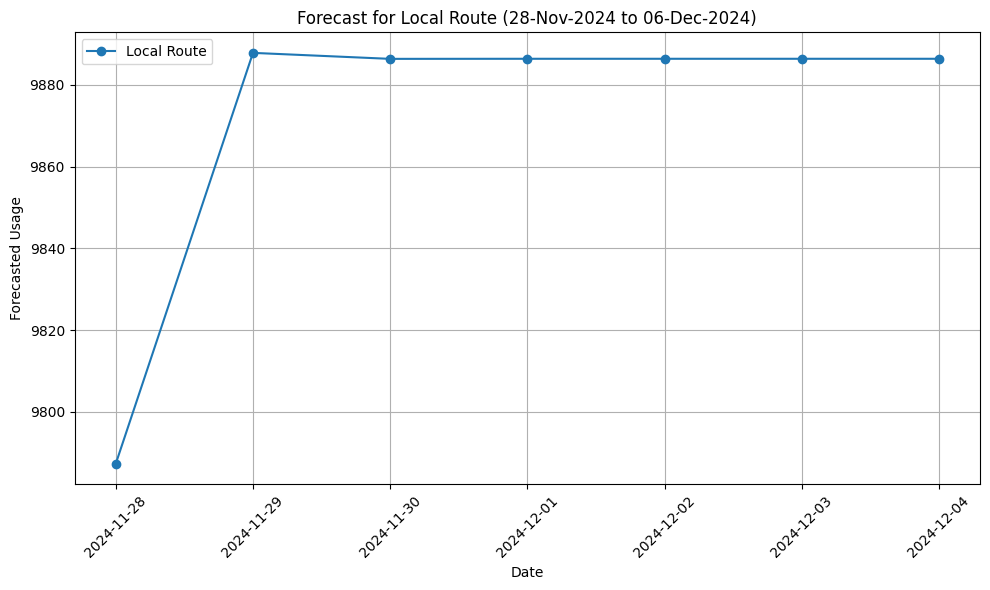

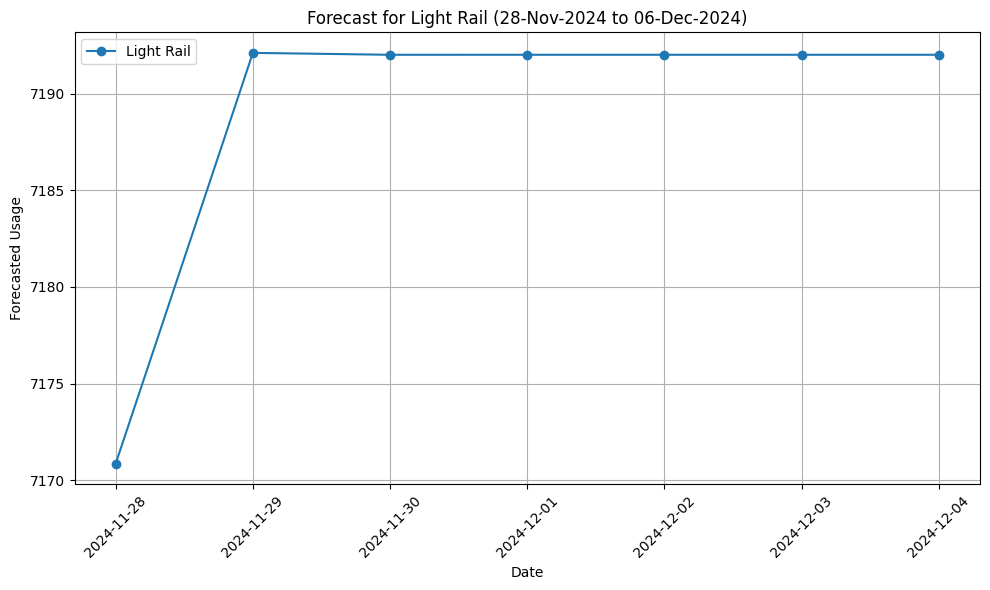

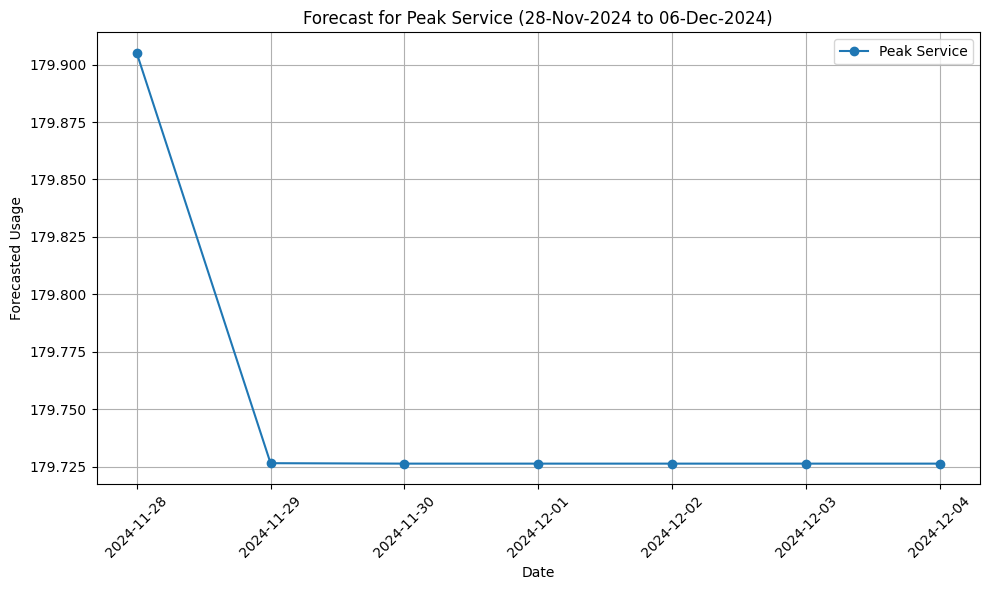

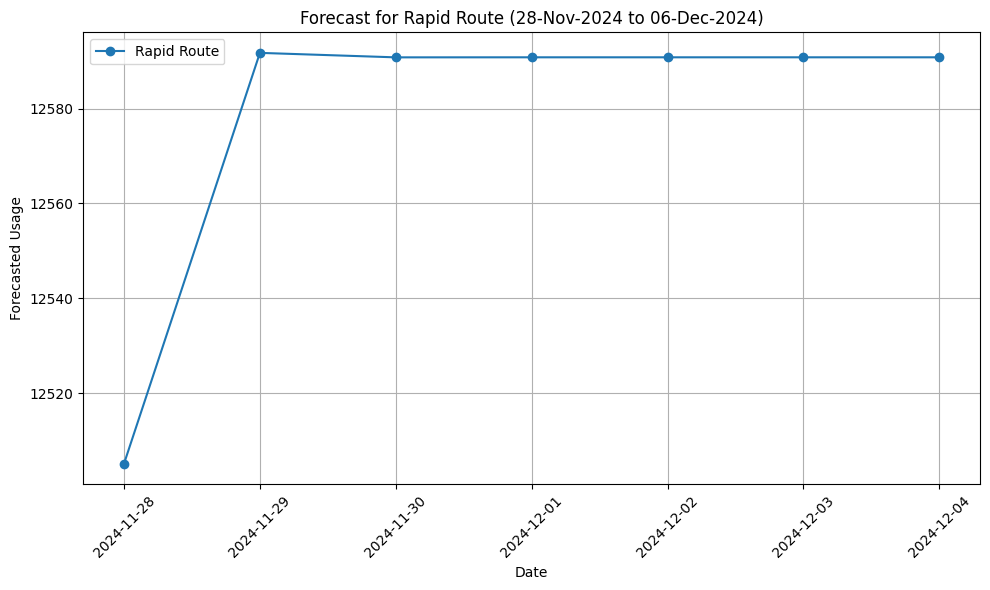

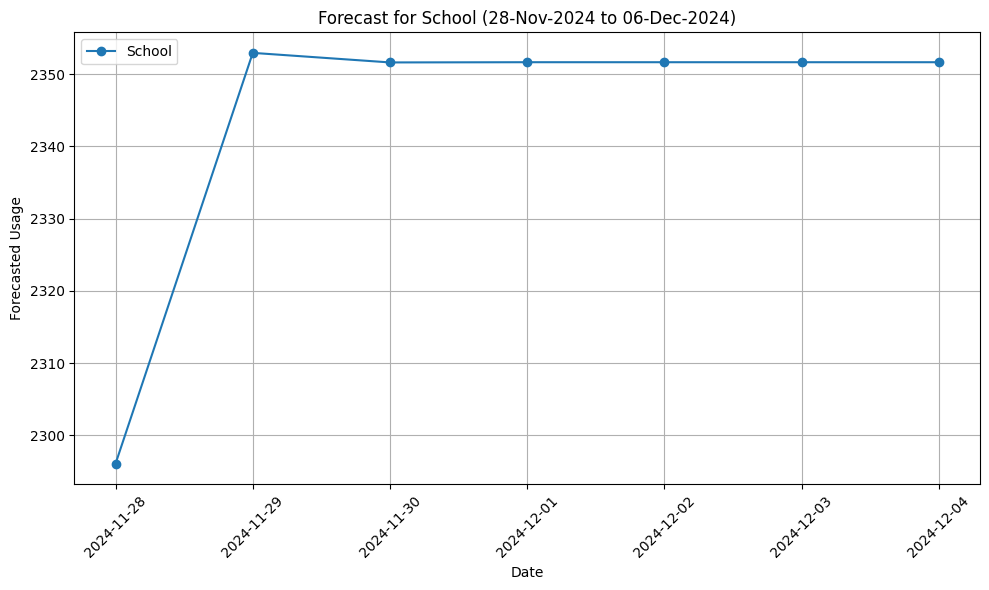

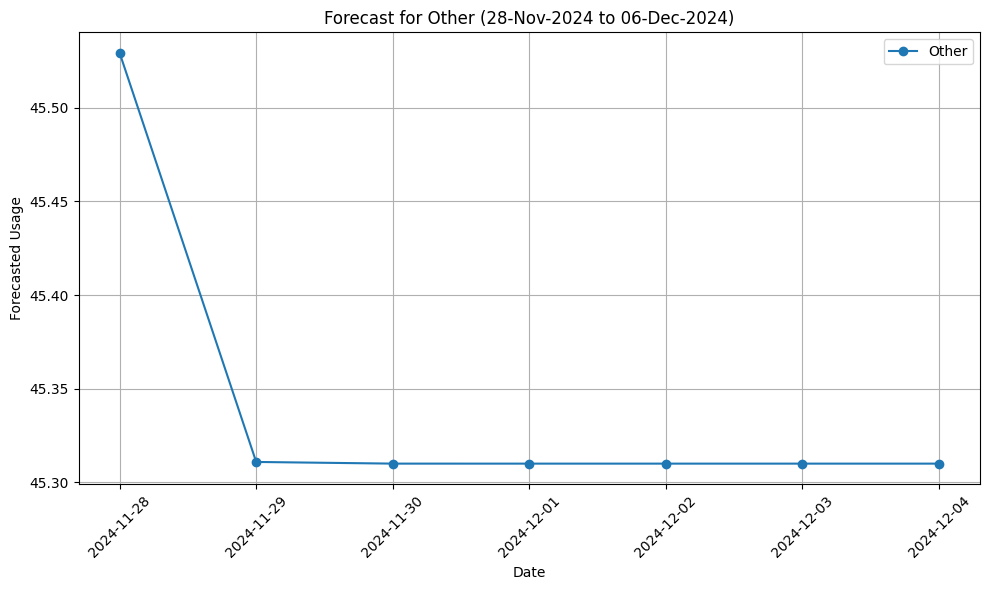

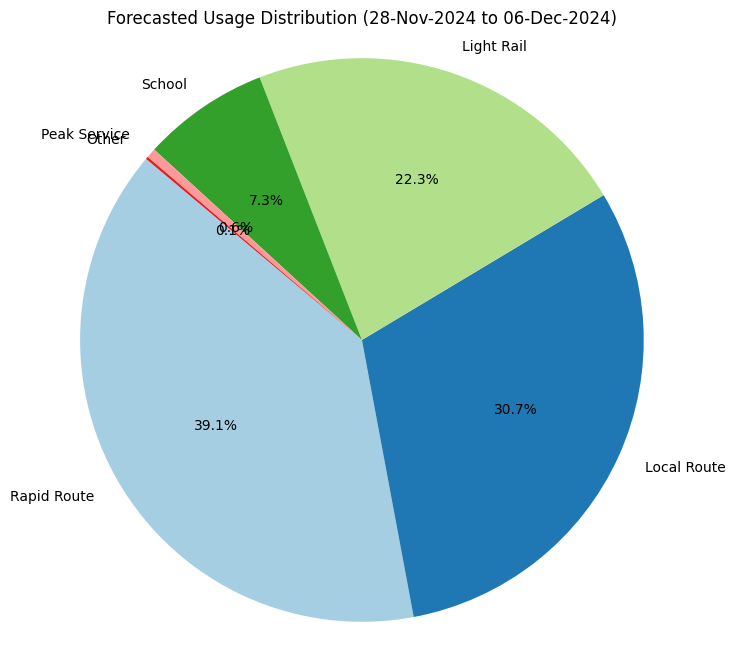

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the columns to forecast
columns_to_forecast = [
    "Local Route",
    "Light Rail",
    "Peak Service",
    "Rapid Route",
    "School",
    "Other",
]

# Ensure 'Date' is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Define the start and end dates for forecasting (28-Nov-2024 to 06-Dec-2024)
forecast_start_date = pd.Timestamp('2024-11-28')
forecast_end_date = pd.Timestamp('2024-12-06')

# Initialize an empty DataFrame to hold the forecast results
forecast_all = pd.DataFrame()

# Initialize a dictionary to store individual forecasts
individual_forecasts = {}

# Forecasting using ARIMA for each column
for col in columns_to_forecast:
    print(f"Forecasting for {col} using ARIMA...")

    # Prepare the data for ARIMA
    series = df[["Date", col]].dropna()  # Drop rows with missing values
    series.set_index("Date", inplace=True)  # Set the Date as the index

    # Fit the ARIMA model
    model = ARIMA(series, order=(1, 1, 1))  # Adjust (p, d, q) as needed
    model_fit = model.fit()

    # Forecast for the next 7 days (from 28-Nov-2024 to 06-Dec-2024)
    forecast = model_fit.forecast(steps=7)
    forecast_dates = pd.date_range(forecast_start_date, periods=7, freq='D')

    # Prepare a DataFrame for the forecast
    forecast_df = pd.DataFrame({
        "Date": forecast_dates,
        "Forecast": forecast,
        "Route": col
    })

    # Append this column's forecast to the overall forecast DataFrame
    forecast_all = pd.concat([forecast_all, forecast_df])

    # Store the forecast for each route
    individual_forecasts[col] = forecast

# Consultation: Find which route is likely to have the highest and lowest forecast
forecast_summary = forecast_all.groupby("Route")["Forecast"].mean()

# Sort the forecast values from highest to lowest
forecast_sorted = forecast_summary.sort_values(ascending=False)

# Display the forecast rankings
print("\nConsultation (Ranking of Routes from Highest to Lowest Forecast):")
for rank, (route, forecast_value) in enumerate(forecast_sorted.items(), 1):
    print(f"{rank}. {route} with an average forecast of {forecast_value:.2f}")

# Plot the bar graph to compare forecasted values for all routes
plt.figure(figsize=(10, 6))
plt.bar(forecast_sorted.index, forecast_sorted.values, color='skyblue')
plt.title("Average 7-Day Forecast for All Routes (28-Nov-2024 to 06-Dec-2024)")
plt.xlabel("Route")
plt.ylabel("Average Forecasted Usage")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot individual forecasts for each route
for col, forecast in individual_forecasts.items():
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_dates, forecast, marker='o', label=col)
    plt.title(f"Forecast for {col} (28-Nov-2024 to 06-Dec-2024)")
    plt.xlabel("Date")
    plt.ylabel("Forecasted Usage")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the pie chart to show the distribution of forecasted usage across routes
plt.figure(figsize=(8, 8))
plt.pie(forecast_sorted.values, labels=forecast_sorted.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Forecasted Usage Distribution (28-Nov-2024 to 06-Dec-2024)")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()
